In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_idealized
import functions_plot

# Bathymetry

Loads the file for either the Stereographic or Geographic projection of the Arctic Ocean (IBCAO) and returns the file's data for x, y, and z. 

In [4]:
xs, ys, zs = functions_plot.get_variables('S')

# Function for canyon axis

In [ ]:
def find_points_diagonal(x1, y1, x2, slope):
    '''Finds coordinates along any line in the
    stereographic projection given point 1 (x1, y1),
    the x2 of point 2, and the slope of the line.
    x2 needs to be bigger(rightward).
    '''
    list_x = np.arange(x1, x2 + 500, 500)
    list_y = np.zeros_like(list_x)
    list_y[:] = (slope * (list_x[:] - x1)) + y1
    list_y[:] = np.round(list_y[:]/500.0)*500.0
    return list_x, list_y

# Real canyon

In [26]:
cst = [-1538000, 1705000]
x_cst = cst[0]; y_cst = cst[1]
z_cst = zs[np.where(ys==y_cst), np.where(xs==x_cst)][0][0]

fC = [-1415000, 1622500]
x_base = fC[0]; y_base = fC[1]
z_base = zs[np.where(ys==y_base), np.where(xs==x_base)][0][0]

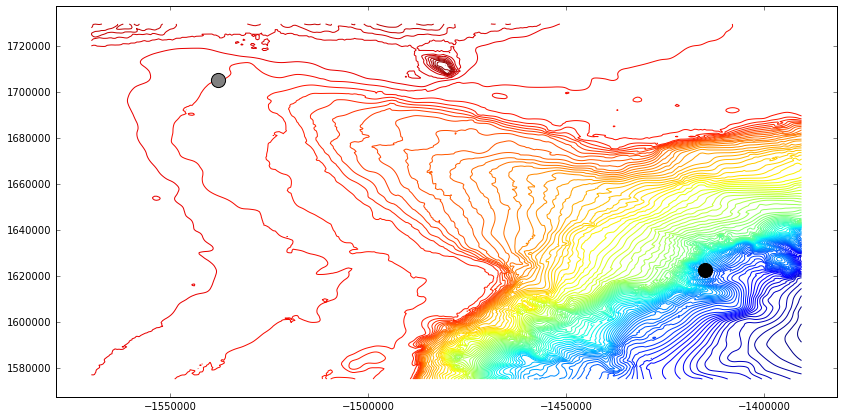

In [29]:
xl=-1570000; xr=-1390000; yb=1575000; yt=1730000
xn, yn, zn = functions_plot.def_regionS(xl, xr, yb, yt)

fig, ax = plt.subplots(1,1,figsize=(14,7))
ax.contour(xn, yn, zn, 100, zorder=1)

ax.scatter(x_base, y_base, s=200, c='k', zorder=2)
ax.scatter(x_cst, y_cst, s=200, c='gray', zorder=2)

# Ideal canyon

In [32]:
xsize, ysize, x_wall, y_wall = 238, 178, 547219.33445374772, 406382.26879306574

x_wall, y_wall, w_break, w_mid, w_head, cR, L, p,\
y_coast, y_head, y_break, y_pointA, y_pointB, y_paral, y_base,\
fluid_depth, z_bottom, z_paral, z_pointA, z_pointB, z_break, z_coast = functions_idealized.Mackenzie_measurements(x_wall, y_wall)

x, y, y_edge, X, Y = functions_idealized.set_domain_grid(xsize, ysize, x_wall, y_wall)

z_ideal = functions_idealized.make_topo_smooth(y_edge, y_base, y_paral, y_pointA, y_pointB, y_break, y_head, y_coast,
                           cR, L, p, x, x_wall, w_break, w_mid, w_head,
                           fluid_depth, z_bottom, z_paral, z_pointA, z_pointB, z_break, z_coast)

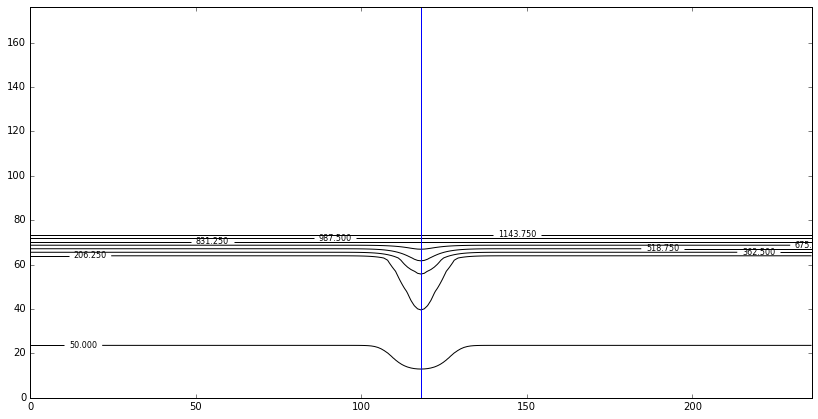

In [38]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
levels = np.linspace(50, fluid_depth, 9)
c = ax.contour(z_ideal, levels = levels, colors='k')
ax.clabel(c, inline=1, fontsize=8)
mid_ideal = int(z_ideal.shape[1]/2)
ax.axvline(mid_ideal)

# Canyon axis

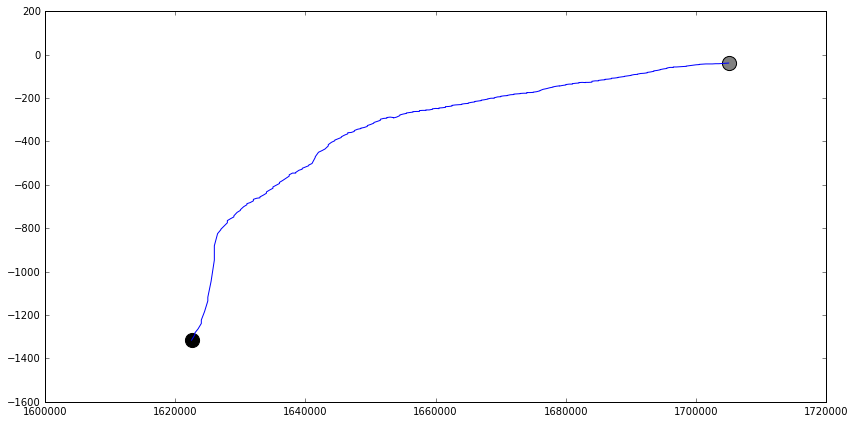

In [30]:
slope = (y_base - y_cst) / (x_base - x_cst)

x_axis, y_axis = find_points_diagonal(x_cst, y_cst, x_base, slope)

z_axis = np.zeros_like(x_axis)
for i in np.arange(len(x_axis)):
    z_axis[i] = zs[np.where(ys==y_axis[i]), np.where(xs==x_axis[i])][0][0]

fig, ax = plt.subplots(1,1,figsize=(14,7))
ax.plot(y_axis, z_axis)
ax.scatter(y_base, z_base, s=200, c='k')
ax.scatter(y_cst, z_cst, s=200, c='gray')

(0, 450000)

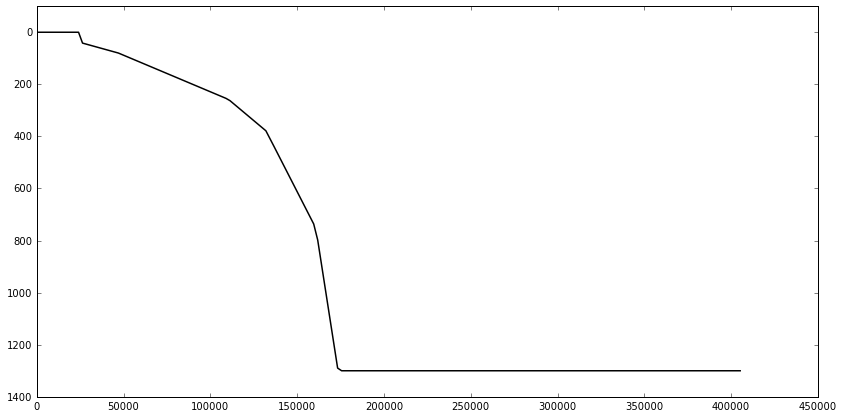

In [47]:
fig, ax = plt.subplots(1,1,figsize=(14,7))
ax.plot(Y[:, mid_ideal], z_ideal[:, mid_ideal], c='k', lw=1.5)
ax.set_ylim([1400,-100]); ax.set_xlim([0,450000])